# PROBLEM 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data_2 = pd.read_csv("problem_2_train.csv")
data_2.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


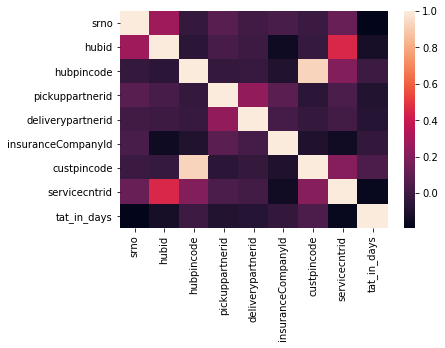

In [3]:
#The heatmap hepls us in identifying how one feature is related to another
sns.heatmap(data_2.corr())

#For example:- here 'tat_in_days' has 0 dependency with 'claimintdate', 'servicecntrid' etc. So we can exclude them in 
#X(dependent variables) and so on.

### dummy testing of model

In [6]:
#This step converts the column values in string to an integer which is a coded value for each unique string
from sklearn.preprocessing import LabelEncoder

labelencod = LabelEncoder()
data_2['claimtype'] = labelencod.fit_transform(data_2['claimtype'])
data_2['custpincodecategory'] = labelencod.fit_transform(data_2['custpincodecategory'])
data_2.head()

#mobmake column has different values for both the datasets(testing ang training). Thus encoding it may result in wrong behaviour

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,1,0,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,1,0,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,1,0,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,2,0,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,1,0,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [11]:
X = data_2[['srno', 'insuranceCompanyId', 'custpincode', 'servicecntrid', 'hubpincode', 'deliverypartnerid', 'claimtype', 'custpincodecategory']]
y = data_2['tat_in_days']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#test_size=0.2 will divide the given data. 80% is for training the model and 20% is used for testing

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


mn = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#root mean squared error lets us know the deviation of the points from the regression line
#can be helpful in determining accuracy of the model
print("Root Mean Squared Error: ", mn)

Root Mean Squared Error:  4.9128433360962775


In [12]:
#since the RMSE is quite high, we need to verify if the model is good

y_pred = linreg.predict(X_train)
mn = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error(for training data): ", mn)

Root Mean Squared Error(for training data):  4.750053495791152


In [13]:
#Also, try to compare your RMSE values of both training and testing data. If they are almost similar, your model is good. 
#If the RMSE for the testing data is much higher than that of the training data, it is likely that you've badly over fit the 
#data.
#source:- https://community.hortonworks.com/questions/61886/how-to-reduce-rmseroot-mean-squred-error-value-for.html

In [14]:
#The unit of RMSE is same as dependent variable. If your data has a range of 0 to 100000 then RMSE value of 3000 is small,
#but if the range goes from 0 to 1, it is pretty huge.
#source:- https://community.hortonworks.com/questions/61886/how-to-reduce-rmseroot-mean-squred-error-value-for.html


#Since our data has range 6250, a value such as 4.88 is good

### Actual training and testing

In [17]:
data_train = pd.read_csv("problem_2_train.csv")
data_train.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [18]:
from sklearn.preprocessing import LabelEncoder

labelencod = LabelEncoder()
data_2['claimtype'] = labelencod.fit_transform(data_2['claimtype'])
data_2['custpincodecategory'] = labelencod.fit_transform(data_2['custpincodecategory'])
data_2.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,1,0,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,1,0,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,1,0,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,2,0,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,1,0,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [19]:
X_train = data_train[['srno', 'insuranceCompanyId', 'custpincode', 'servicecntrid', 'hubpincode', 'deliverypartnerid']]
y_train = data_train['tat_in_days']

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
data_test = pd.read_csv("problem_2_test.csv")
data_test.head()

problem2_data = data_test.copy()

X_test = data_test[['srno', 'insuranceCompanyId', 'custpincode', 'servicecntrid', 'hubpincode', 'deliverypartnerid']]
problem2_data['tat_in_days'] = linreg.predict(X_test)
problem2_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,14.185719
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,13.426023
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,13.250629
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,14.186955
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,13.689536


In [26]:
problem2_data.to_csv(r"C:\Users\DELL PC\Desktop\MLAssign\problem2_data.csv", encoding='utf-8')

# PROBLEM 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics

In [3]:
data_1 = pd.read_csv("train.csv")
data_1 = data_1.fillna(0)
data_1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [11]:
data_1_test = pd.read_csv("test.csv")
data_1_test = data_1_test.fillna(0)
problem1_data = data_1_test.copy()
dummy_data = data_1_test.copy()
data_1_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


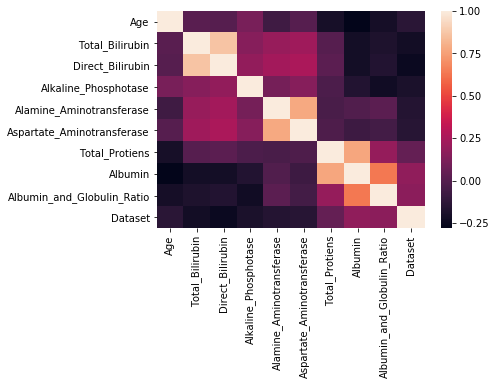

In [7]:
sns.heatmap(data_1.corr())

#After viewing the maoo carefully it may be found that all the features are dependent on eachh other directly or indirectly
#Thus, considering all would be beneficial

In [12]:
#Since gender has its values in strings we need to code it first
#And moreover, both the datasets have only 2 genders

from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()
data_1['Gender'] = labenc.fit_transform(data_1['Gender'])
data_1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


### dummy testing of model

In [6]:
X = data_1[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y = data_1['Dataset']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### ->using Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using Logisticregression: ", accuracy_score(y_test, y_pred))

Accuracy Score using Logisticregression:  0.7659574468085106


c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

#the values in the diagonal of the confusion matrix must be high concluding to higher accuracy

[[68  6]
 [16  4]]


#### ->using Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion="entropy")
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using DecisionTree: ", accuracy_score(y_test, y_pred))

Accuracy Score using DecisionTree:  0.7446808510638298


#### -> using Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score using RandomForest: ", accuracy_score(y_test, y_pred))

Accuracy Score using RandomForest:  0.7127659574468085


c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### ->using Support Vector Machine

In [8]:
from sklearn import svm

model = svm.SVC(kernel='rbf', C=1, gamma=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy using SupportVectorMachine: ", accuracy_score(y_test, y_pred))

Accuracy using SupportVectorMachine:  0.7978723404255319


### Actual training and testing

In [13]:
labenc = LabelEncoder()
data_1_test['Gender'] = labenc.fit_transform(data_1_test['Gender'])
data_1_test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


In [55]:
X_train = data_1[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y_train = data_1['Dataset']

X_test = data_1_test[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\users\dell pc\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
problem1_data['Dataset'] = logreg.predict(X_test)
problem1_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,2
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34,2
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00,1


In [57]:
problem1_data.to_csv(r"C:\Users\DELL PC\Desktop\MLAssign\problem1_data.csv", encoding='utf-8')

In [58]:
#Submitted by:-
#Gagandeep Kaur
#B. Tech
#Guru Nanak Dev University, Amritsar